In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import math
%matplotlib inline

In [2]:
# read the data from the csv file created by the Data_Preprocessing notebook
data = pd.read_csv('data/raw_data_unscaled.csv', index_col=0, parse_dates=True)
data.head()

,cl_kadij,cl_lobith,afv_lobith,stand_hvh,cum_stand
1982-02-11 00:00:00,126.0,121.000,3679.88,-52.0,NaN
1982-02-11 01:00:00,116.0,112.223,3673.90,-55.0,NaN
1982-02-11 02:00:00,123.0,112.263,3668.01,-39.0,NaN
1982-02-11 03:00:00,126.0,112.359,3662.27,-8.0,NaN
1982-02-11 04:00:00,113.0,112.527,3656.70,86.0,NaN


### Analysing and preprocessing the data
First we make sure the input data is as normally distributed as possible

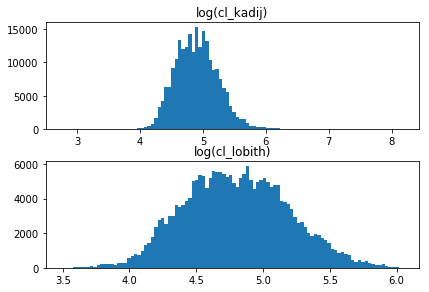

In [3]:
# use log for cl data
f, ax_array = plt.subplots(2)
f.tight_layout()
ax_array[0].hist(np.log(data['cl_kadij']), bins=100)
ax_array[0].set_title('log(cl_kadij)')
ax_array[1].hist(np.log(data['cl_lobith']), bins=100)
ax_array[1].set_title('log(cl_lobith)');

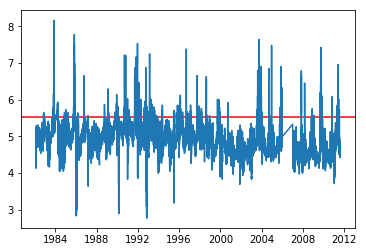

In [4]:
plt.axhline(np.log(250),color='red') 
plt.plot(np.log(data['cl_kadij']));

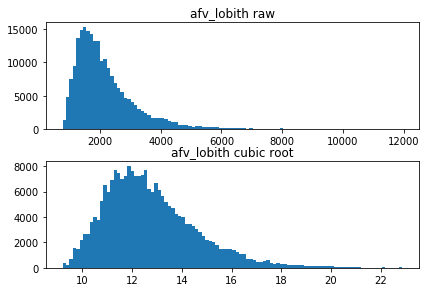

In [5]:
# afv_lobith can be used as is or since it's cubic, take the cubic root
f, ax_array = plt.subplots(2)
f.tight_layout()
ax_array[0].hist(data['afv_lobith'], bins=100)
ax_array[0].set_title('afv_lobith raw')
ax_array[1].hist((data['afv_lobith'])**(1.0/3.0), bins=100)
ax_array[1].set_title('afv_lobith cubic root');

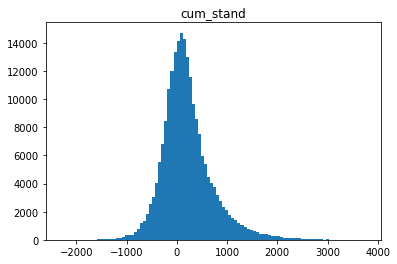

In [6]:
# the cum_stand data can be used as is
plt.hist(data.dropna()['cum_stand'], bins=100)
plt.title('cum_stand');

In [7]:
# Conclusion: use the cubic root for afv_lobith and the log for both cl parameters
nn_data_raw = data.copy()
nn_data_raw['cl_kadij'] = np.log(nn_data_raw['cl_kadij'])
nn_data_raw['cl_lobith'] = np.log(nn_data_raw['cl_lobith'])
nn_data_raw['afv_lobith'] = (nn_data_raw['afv_lobith'])**(1.0/3.0)
nn_data_raw.drop(['stand_hvh'], axis=1, inplace=True)
nn_data_raw.head()

,cl_kadij,cl_lobith,afv_lobith,cum_stand
1982-02-11 00:00:00,4.836282,4.795791,15.438717,NaN
1982-02-11 01:00:00,4.753590,4.720488,15.430350,NaN
1982-02-11 02:00:00,4.812184,4.720844,15.422100,NaN
1982-02-11 03:00:00,4.836282,4.721699,15.414051,NaN
1982-02-11 04:00:00,4.727388,4.723193,15.406232,NaN


In [8]:
# write this intermediate data to file in case we want the unscaled data later
nn_data_raw.to_csv('data/nn_data_raw_unscaled.csv')

### Scaling the data
We scale all input data to the interval (0,1) to avoid bias in the neural network for input parameters which are larger

In [9]:
# define a function to easily normalize the data:
def normalize_data(data):
    '''returns (scaler, scaled_data)'''
    data = data.values
    data = data[~np.isnan(data)].reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(0,1))
    data = scaler.fit_transform(data)
    return (scaler, data)

In [10]:
# scale the data to interval (0,1)
nn_data_scaled = nn_data_raw.copy()
(cl_kadij_scaler, nn_data_scaled['cl_kadij']) = normalize_data(nn_data_raw['cl_kadij'])
(cl_lobith_scaler, nn_data_scaled['cl_lobith']) = normalize_data(nn_data_raw['cl_lobith'])
(afv_lobith_scaler, nn_data_scaled['afv_lobith']) = normalize_data(nn_data_raw['afv_lobith'])
(stand_scaler, stand_scaled_data) = normalize_data(nn_data_raw.dropna()['cum_stand'])
nn_data_scaled.loc[~np.isnan(nn_data_scaled['cum_stand']), 'cum_stand'] = stand_scaled_data.flatten()
nn_data_scaled.head(n=30)

,cl_kadij,cl_lobith,afv_lobith,cum_stand
1982-02-11 00:00:00,0.382900,0.510193,0.456683,NaN
1982-02-11 01:00:00,0.367557,0.480554,0.456070,NaN
1982-02-11 02:00:00,0.378429,0.480695,0.455466,NaN
1982-02-11 03:00:00,0.382900,0.481031,0.454876,NaN
1982-02-11 04:00:00,0.362696,0.481619,0.454303,NaN
1982-02-11 05:00:00,0.341865,0.482465,0.453748,NaN
1982-02-11 06:00:00,0.254293,0.483514,0.453207,NaN
1982-02-11 07:00:00,0.251324,0.484692,0.452679,NaN
1982-02-11 08:00:00,0.262924,0.485929,0.452892,NaN
1982-02-11 09:00:00,0.320470,0.487173,0.451666,NaN


In [11]:
# write the scaled data to file in case we want it later
nn_data_scaled.to_csv('data/nn_data_raw_scaled.csv')

In [12]:
# write the scalers to file in case we want them later
index = ['cl_kadij_scaler', 'cl_lobith_scaler', 'afv_lobith_scaler', 'stand_scaler']
columns = ['data_max_', 'data_min_', 'data_range_']
scalers = [cl_kadij_scaler, cl_lobith_scaler, afv_lobith_scaler, stand_scaler]
data = np.zeros((4,3),dtype=float)
for i in range(0,len(scalers)):
    scaler = scalers[i]
    data[i][0] = scaler.data_max_[0]
    data[i][1] = scaler.data_min_[0]
    data[i][2] = scaler.data_range_[0]
scaler_data = pd.DataFrame(data=data, columns=columns, index=index)
scaler_data.to_csv('data/scaler_data.csv')
scaler_data.head()

,data_max_,data_min_,data_range_
cl_kadij_scaler,8.162231,2.772589,5.389642
cl_lobith_scaler,6.040255,3.499533,2.540721
afv_lobith_scaler,22.854405,9.205479,13.648926
stand_scaler,3752.000000,-2309.000000,6061.000000


In [13]:
# we will be able to retransform the data later using:
scaled_value = nn_data_scaled['cl_kadij'][0]
unscaled_value = scaled_value * scaler_data.loc['cl_kadij_scaler','data_range_'] + scaler_data.loc['cl_kadij_scaler','data_min_']
print('scaled_value', scaled_value)
print('unscaled_value', unscaled_value)
print('original value', nn_data_raw['cl_kadij'][0])

scaled_value 0.382899838855
unscaled_value 4.83628190695
original value 4.83628190695


### Use the high correlation intervals for input parameters
In the Correlation_Analysis notebook, we found intervals (in days) where the correlation between cl_kadij and the input parameters cl_lobith, afv_lobith and cum_stand was high. For the NN we use the data of x days past for these input parameters where x is in the found intervals. 

In [14]:
# use the intervals selected in the Correlation_Analysis notebook
afv_lobith_firstday = 6
afv_lobith_lastday = 9

cl_lobith_firstday = 3
cl_lobith_lastday = 6

stand_firstday = 1 #would ideally be 0 but then we need to use prediction for prediction so let's avoid that for the moment
stand_lastday = 2

In [15]:
# define a function to add shifted data to a dataframe (note that it doesn't detect gaps!)
def add_shifted_data(result_data, raw_data, var_name, firstday, lastday, multiplier):
    '''adds shifted data to the result_data dataframe
       returns a new dataframe containing the shifted data
       @param result_data: the dataframe to which the data should be added
       @param raw_data: the dataframe containing the input data to be shifted
       @param var_name: the name of the variable in raw_data that is to be shifted
       @param firstday & lastday: the data will be shifted and added for each number of days in the interval [firstday,lastday]
       @param multiplier: if the raw_data contains data rows with hours, use multiplier 24'''
    for i in range(firstday, lastday+1):
        result_data = pd.concat([result_data, raw_data.shift(i*multiplier)[var_name].rename(var_name + '_' + str(i))], axis=1)
    return result_data

In [16]:
# define a function that removes a certain number of data items before and after each gap
def remove_gaps(data, timedelta, num_before, num_after):
    '''removes the first num_before rows before each gap and the first num_after rows after each gap
       returns a new dataframe in which the rows are removed
       @param data: the dataframe in which the rows should be deleted
       @param timedelta: the timedelta used to detect gaps'''
    gaps = (data.index.values[1:] - data.index.values[:-1]) != timedelta
    print('detected', np.sum(gaps), 'gaps')
    
    delete_these = np.zeros(data.shape[0], dtype=bool)
    gap_indices = np.where(gaps == True)[0] + 1
    
    for i in range(0,len(gap_indices)):
        gap_index = gap_indices[i]
        if i+1 >= len(gap_indices):
            next_gap_index = len(gap_indices)
        else:
            next_gap_index = gap_indices[i+1] 
        range_limit = min(gap_index+num_after, next_gap_index)
        for j in range(gap_index,range_limit):
            delete_these[j] = True
        
        if i-1 < 0:
            prev_gap_index = 0
        else:
            prev_gap_index = gap_indices[i-1]
        for j in range(max(gap_index - num_before, prev_gap_index), gap_index):
            delete_these[j] = True
    
    print('removing', np.sum(delete_these), 'data entries')
    return data.drop(data.index[delete_these])

In [17]:
# construct a dataframe containing the wanted input parameters and output
nn_data = pd.concat([nn_data_scaled['cl_kadij'].rename('cl_kadij_out'),nn_data_scaled.shift(24)['cl_kadij'].rename('cl_kadij_1')], axis=1)
nn_data = add_shifted_data(nn_data, nn_data_scaled, 'cl_lobith', cl_lobith_firstday, cl_lobith_lastday, 24)
nn_data = add_shifted_data(nn_data, nn_data_scaled, 'afv_lobith', afv_lobith_firstday, afv_lobith_lastday, 24)
nn_data = add_shifted_data(nn_data, nn_data_scaled, 'cum_stand', stand_firstday, stand_lastday, 24)
nn_data = remove_gaps(nn_data, np.timedelta64(1,'h'), 0, 24 * np.max([cl_lobith_lastday, afv_lobith_lastday, stand_lastday]))
nn_data.dropna(inplace=True)
print('number of remaining data entries:',len(nn_data))
nn_data.head(n = 25)

detected 461 gaps
removing 63275 data entries
number of remaining data entries: 162440


,cl_kadij_out,cl_kadij_1,cl_lobith_3,cl_lobith_4,cl_lobith_5,cl_lobith_6,afv_lobith_6,afv_lobith_7,afv_lobith_8,afv_lobith_9,cum_stand_1,cum_stand_2
1982-02-20 00:00:00,0.415250,0.407675,0.592120,0.575943,0.513432,0.431211,0.419874,0.433580,0.444696,0.456683,0.279987,0.304240
1982-02-20 01:00:00,0.415250,0.408959,0.592350,0.570994,0.506303,0.470955,0.419275,0.433013,0.444243,0.456070,0.278667,0.303910
1982-02-20 02:00:00,0.415250,0.408959,0.592669,0.572327,0.509841,0.470624,0.418678,0.432440,0.443792,0.455466,0.278832,0.304570
1982-02-20 03:00:00,0.415250,0.408959,0.592994,0.573597,0.513313,0.470653,0.418081,0.431868,0.443342,0.454876,0.279162,0.304570
1982-02-20 04:00:00,0.415250,0.410235,0.593334,0.574802,0.516693,0.471095,0.417482,0.431301,0.442892,0.454303,0.279162,0.303910
1982-02-20 05:00:00,0.415250,0.411501,0.593694,0.575954,0.519972,0.471917,0.416882,0.430738,0.442440,0.453748,0.278172,0.302425
1982-02-20 06:00:00,0.417707,0.415250,0.594076,0.577067,0.523148,0.473023,0.416280,0.430180,0.441987,0.453207,0.277182,0.299951
1982-02-20 07:00:00,0.421333,0.416482,0.594467,0.578150,0.526229,0.474294,0.415679,0.429625,0.441533,0.452679,0.275037,0.297806
1982-02-20 08:00:00,0.423712,0.417707,0.594863,0.579208,0.529232,0.475635,0.414684,0.429941,0.440797,0.452892,0.272232,0.296486
1982-02-20 09:00:00,0.424890,0.418924,0.595254,0.580246,0.532174,0.476982,0.414479,0.428525,0.440622,0.451666,0.268108,0.295496


In [18]:
# write the resulting dataframe to csv in case we want it later:
nn_data.to_csv('data/nn_data_full_scaled.csv')

### Prepare the batches of train, test and validation data
For the NN we will divide this data into batches based on the gaps, where each batch will contain data in an uninterupted time interval with a time step of 1 day. We will then divide these batches into train, test and validation data. 

In [19]:
# define a function to get 1 day timestep batches from the data
def get_batches_for_time(data, time, verbose=2):
    '''takes the data entries at the provided time of day and divides them into batches of continuous (gapless) data'''
    nn_data = data.between_time(time, time)
    gaps = (nn_data.index.values[1:] - nn_data.index.values[:-1]) == np.timedelta64(1,'D')
    if verbose == 2:
        print('detected', np.sum(~gaps), 'gaps')
    gap_indices = (np.where(gaps == False))[0] + 1
    gap_indices = np.append(gap_indices,nn_data.shape[0])
    
    last_index = 0
    batches = []
    batch_sizes = []
    for i in gap_indices:
        batches.append(nn_data.iloc[last_index:i])
        batch_sizes.append(nn_data.iloc[last_index:i].shape[0])
        last_index = i
    
    if verbose >= 1:
        print('created', len(batches), 'batches for time', time)
    if verbose == 2:
        print('batch lengths:')
        print(batch_sizes)
        print('minimum length', np.min(batch_sizes))
        print('maximum length', np.max(batch_sizes))
        print('total entries', np.sum(batch_sizes))
        
    return batches

In [20]:
# now get batches for each time of day (0:00, 1:00, etc.)
batches = []
for time in range(0,24):
    time_string = str(time) + ':00'
    batches += get_batches_for_time(nn_data, time_string,1)
print('total number of batches', len(batches))

created 234 batches for time 0:00
created 234 batches for time 1:00
created 234 batches for time 2:00
created 234 batches for time 3:00
created 234 batches for time 4:00
created 234 batches for time 5:00
created 234 batches for time 6:00
created 233 batches for time 7:00
created 234 batches for time 8:00
created 234 batches for time 9:00
created 234 batches for time 10:00
created 234 batches for time 11:00
created 234 batches for time 12:00
created 233 batches for time 13:00
created 233 batches for time 14:00
created 233 batches for time 15:00
created 232 batches for time 16:00
created 232 batches for time 17:00
created 232 batches for time 18:00
created 232 batches for time 19:00
created 232 batches for time 20:00
created 232 batches for time 21:00
created 232 batches for time 22:00
created 232 batches for time 23:00
total number of batches 5596


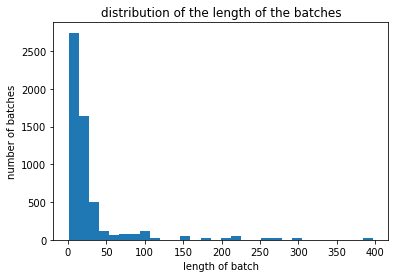

In [21]:
# visualize the distribution
plt.title('distribution of the length of the batches')
plt.xlabel('length of batch')
plt.ylabel('number of batches')
plt.hist([len(batch) for batch in batches], bins=30);

In [22]:
# ONLY USE THIS CELL TO GENERATE A NEW SHUFFLE WHEN ABSOLUTELY NECESSARY
# # generate a random shuffle of the batches to make sure batches for the same time are no longer right after each other
# shuffled_batch_indices = np.arange(0,len(batches))
# np.random.shuffle(shuffled_batch_indices)
# print(shuffled_batch_indices)
# np.savetxt('data/shuffle', shuffled_batch_indices)

In [23]:
# read the provided shuffle from file and use it to divide the batches among test, train and validation data
shuffle = np.genfromtxt('data/shuffle', dtype=int)
if (len(batches) != len(shuffle)):
    print('The number of batches is different from the read shuffle')
    print('Use the above cell to generate a new shuffle but please be aware that this will result in a different distribution of batches among train, test and validation data.')
    print('Old models should not be reused on this new data and if the old data is already present in the test, train and validate folders, please move it or the new batches will not be written')
    raise ValueError('number of batches does not match the shuffle length')

train_batches = []
test_batches = []
validate_batches = []
for i in range(0,len(batches)):
    if i % 4 == 0 or i % 4 == 1:
        train_batches.append(batches[shuffle[i]])
    elif i % 4 == 2:
        test_batches.append(batches[shuffle[i]])
    else:
        validate_batches.append(batches[shuffle[i]])
        
print(np.sum([len(batch) for batch in train_batches]), 'train instances in', len(train_batches), 'batches')
print(np.sum([len(batch) for batch in test_batches]), 'test instances in', len(test_batches), 'batches')
print(np.sum([len(batch) for batch in validate_batches]), 'validate instances in', len(validate_batches), 'batches')

77887 train instances in 2798 batches
42430 test instances in 1399 batches
42123 validate instances in 1399 batches


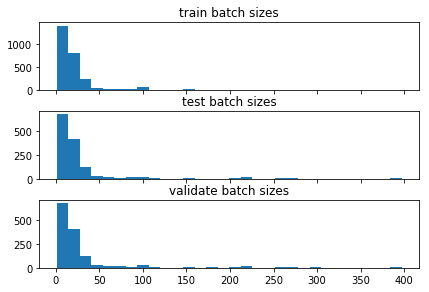

In [24]:
# visualize the batch size distribution for each set
bins = 30
f, axarr = plt.subplots(3, sharex=True)
f.tight_layout()
axarr[0].hist([len(batch) for batch in train_batches], bins=bins)
axarr[1].hist([len(batch) for batch in test_batches], bins=bins)
axarr[2].hist([len(batch) for batch in validate_batches], bins=bins)
axarr[0].set_title('train batch sizes')
axarr[1].set_title('test batch sizes')
axarr[2].set_title('validate batch sizes');

In [25]:
# define a function to quickly write an array of batches to a file:
def write_batches_to_file(batches, filename):
    for i in range(0,len(batches)):
        batches[i].to_csv(filename + '_' + str(i) + '.csv')

In [26]:
# write the train, test and validate batches to files for use later:
# note that if the total number of batches has become smaller, some of the old files may not be overwritten. 
# this should only happen if the number of gaps is different
import os
if (os.listdir('data/train') != [] or os.listdir('data/test') != [] or os.listdir('data/validate') != []):
    print('Are you sure you want to overwrite the current data?')
    print('Note that if this notebook was re-executed the data will be shuffled in a different order and this may result in mixing the train, test and validate data for a previously trained and stored model!')
    print('Please back up the current train, test and validate directories first')
else:
    write_batches_to_file(train_batches, 'data/train/batch')
    write_batches_to_file(test_batches, 'data/test/batch')
    write_batches_to_file(validate_batches, 'data/validate/batch')